In [6]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [7]:
@dataclass
class Data:
    th = None
    omega = None
    u = None

In [2]:
def reward_function(th, omega, u):
    target_angle = np.pi
    angle_reward = 0.01*th**2
    correctVelocity_reward = (omega)**2
#     voltage_penalty = -0.01*(u)**2

    reward = angle_reward + correctVelocity_reward# + voltage_penalty
    return reward

def normalise_angle(theta):
    return ((theta)%(2*np.pi))-np.pi

target_angle=np.pi
angle_reward = lambda self: ((np.cos(self.th-target_angle)+1.5)**2 - 0.25)
correctVelocity_reward = lambda self: 0.00125*(((np.cos(self.th)+1)/2)*(self.omega)**2)
voltage_penalty = lambda self: -0.01*((self.u)**2)*(np.sin(self.th-np.pi/2)+1)/2
incorrectAngle_penalty = lambda self: -0.01*np.abs(self.th-target_angle)

reward_lambda = lambda self: angle_reward(self) + correctVelocity_reward(self) + voltage_penalty(self) # + incorrectAngle_penalty(self)
def reward_function(self):
    q=normalise_angle(self.th)
    if (abs(q)<=np.pi/4): return 20-5*(q+1)**2-0.1*self.omega**2
    else: return reward_lambda(self)

In [8]:
size = 61
theta_list = np.linspace(-np.pi, np.pi, size)
omega_list = np.linspace(-60, 60, size)
u_list = np.linspace(-3, 3, size)
theta, omega, u = np.meshgrid(theta_list, omega_list, u_list)

# data=Data()
# data.th, data.omega data.u = 
# reward = reward_function(theta, omega, u)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

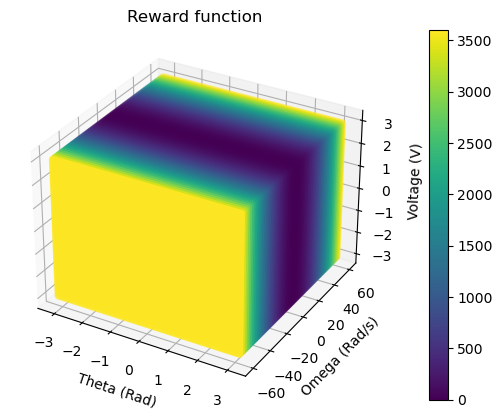

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

data_plot = ax1.scatter(theta, omega, u, c=reward)
fig.colorbar(data_plot, pad=0.1)

# Add title and axis names
plt.title('Reward function')
ax1.set_xlabel('Theta (Rad)')
ax1.set_ylabel('Omega (Rad/s)')
ax1.set_zlabel('Voltage (V)')
plt.show()

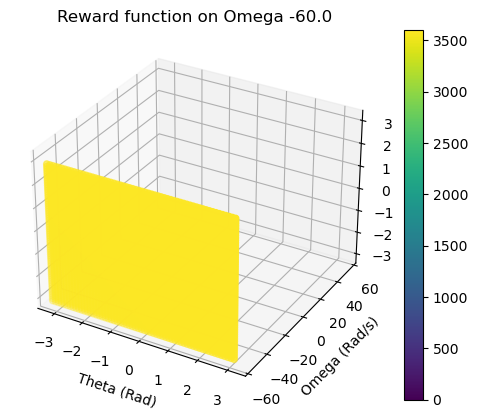

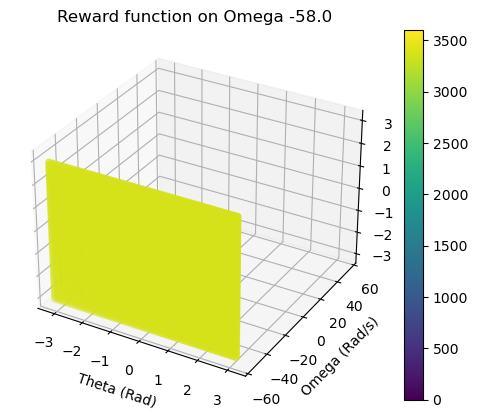

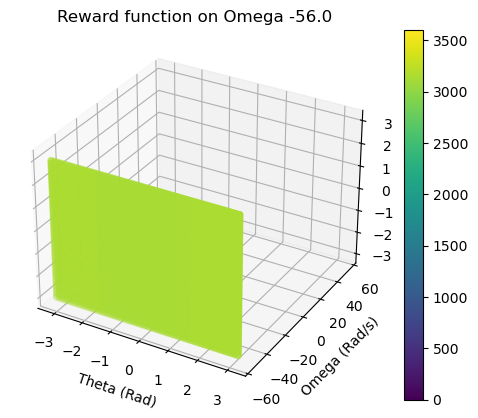

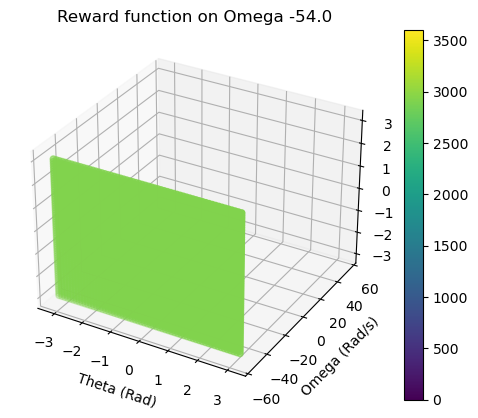

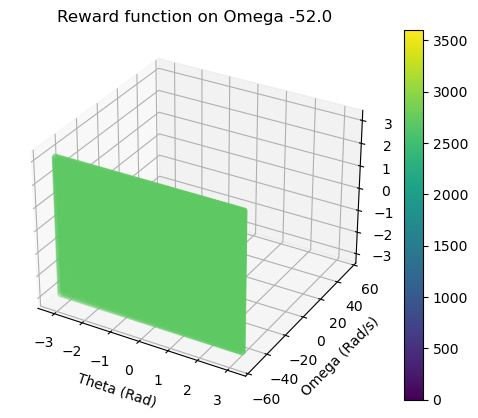

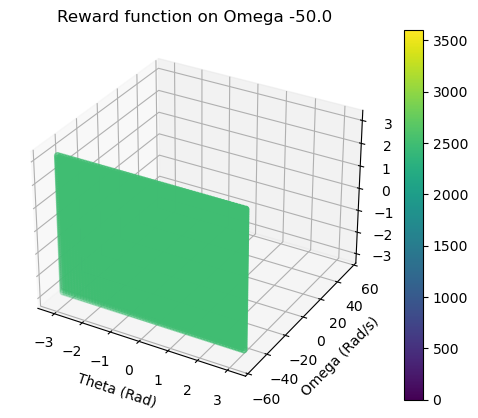

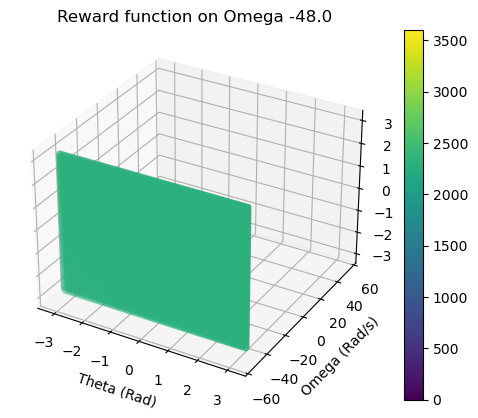

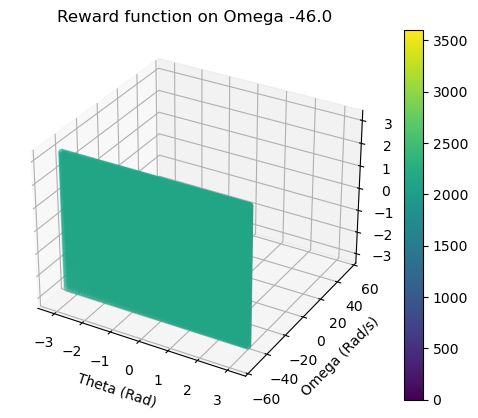

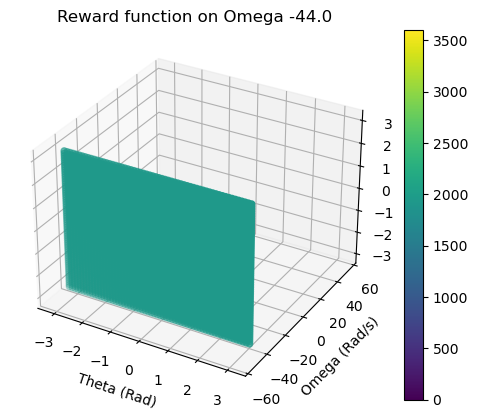

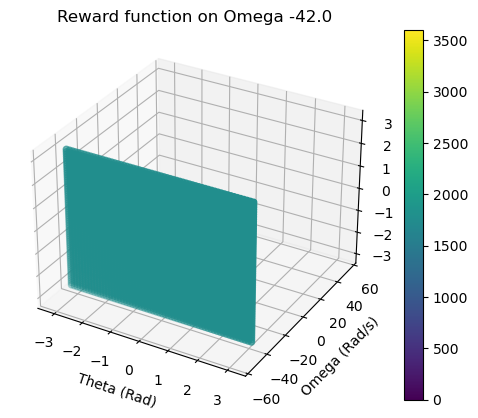

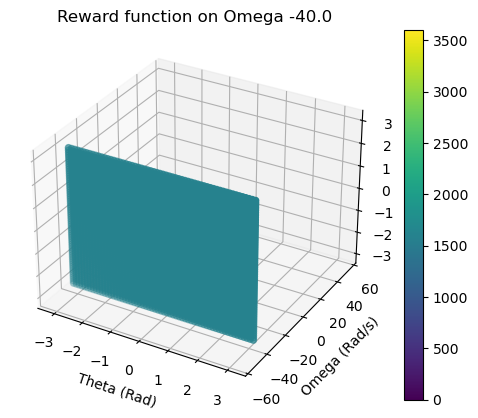

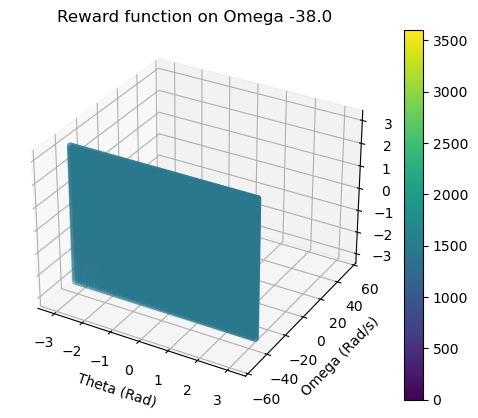

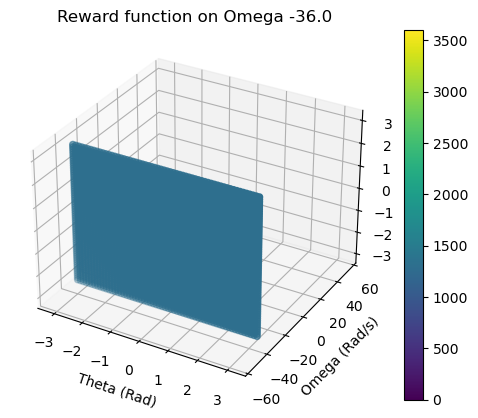

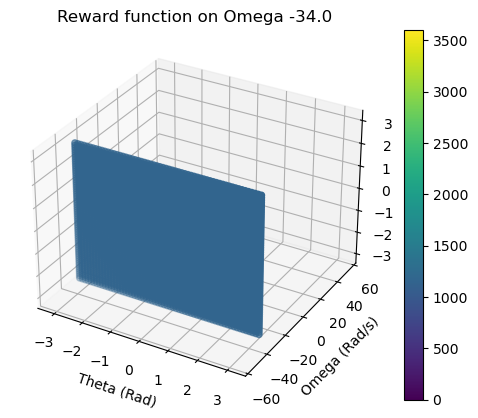

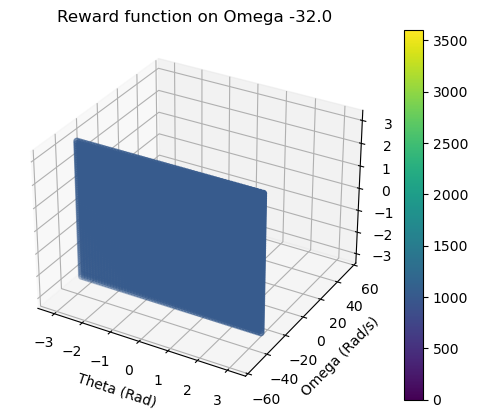

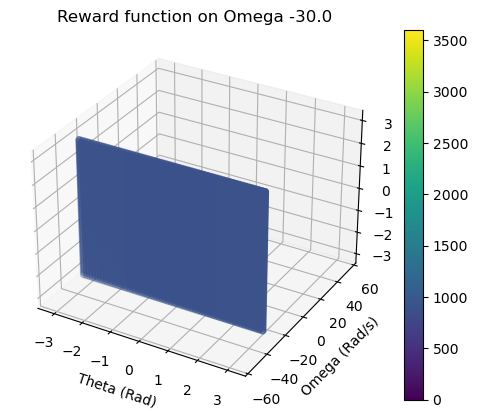

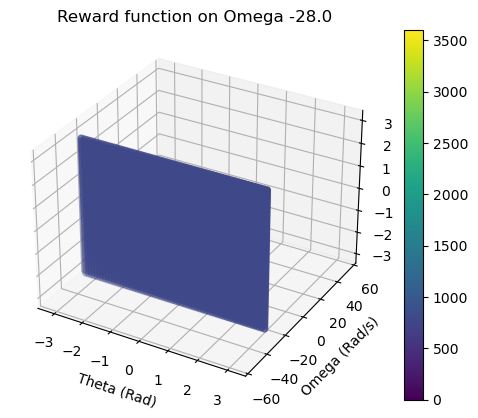

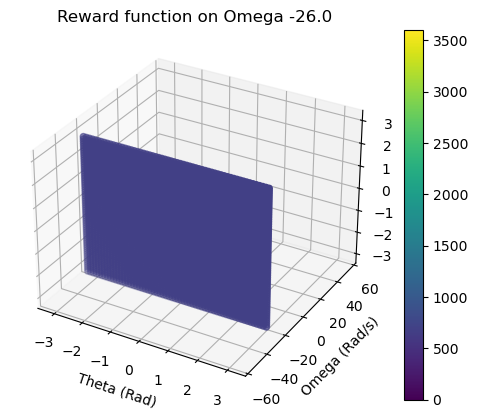

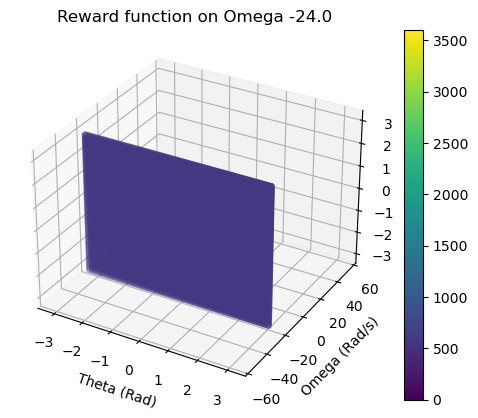

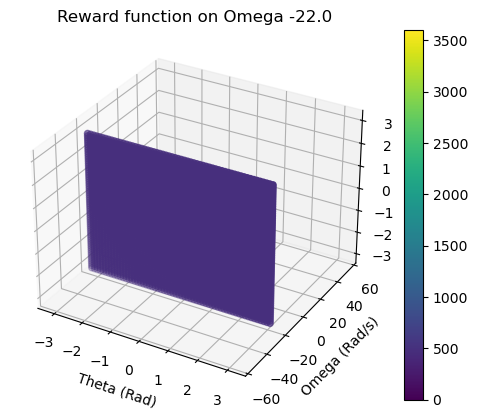

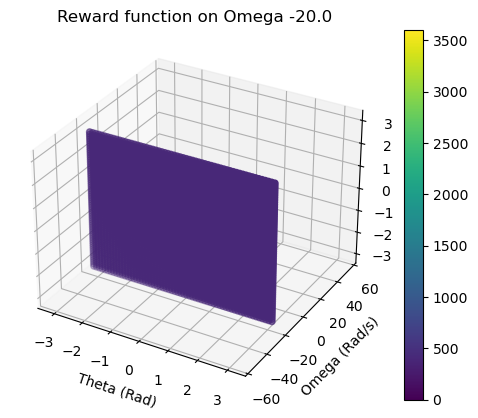

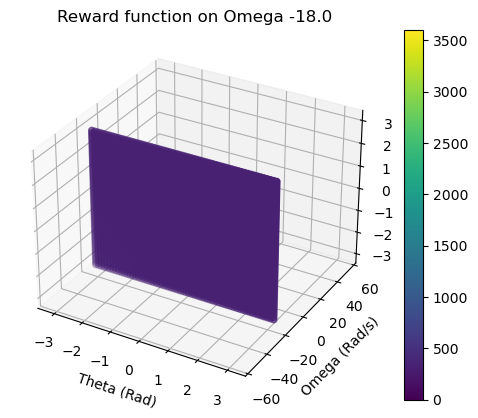

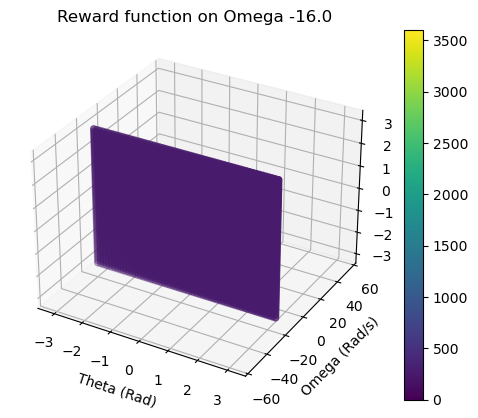

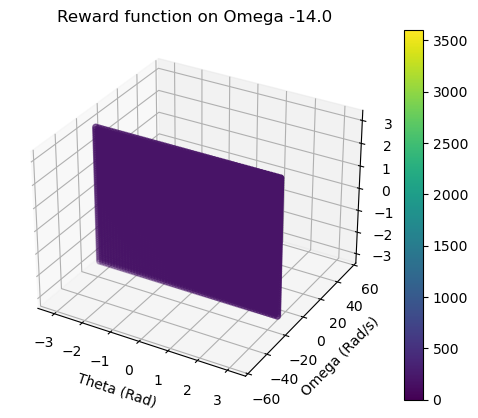

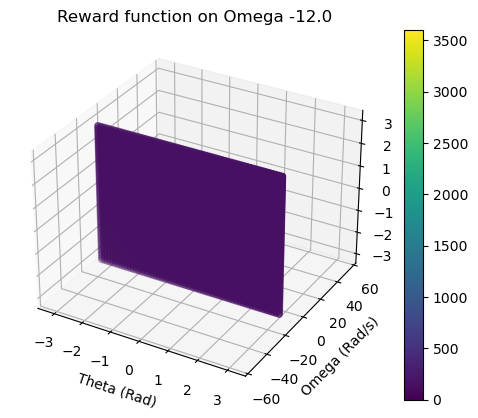

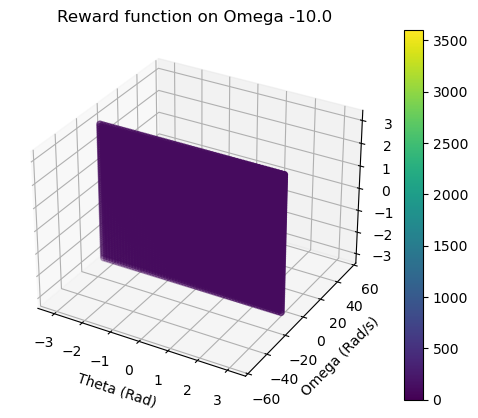

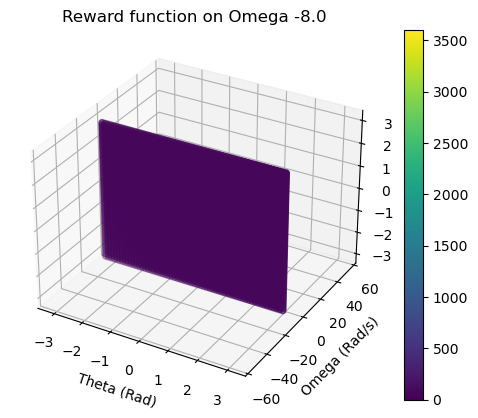

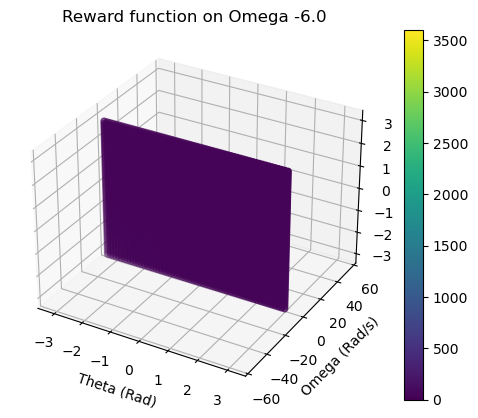

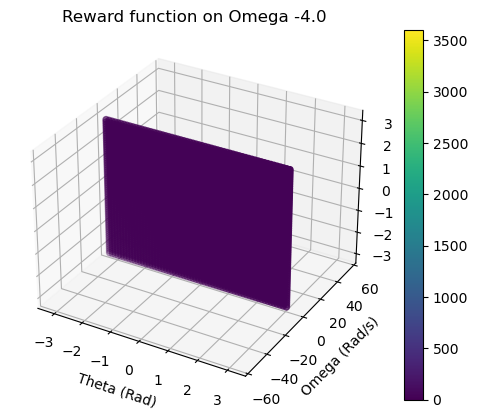

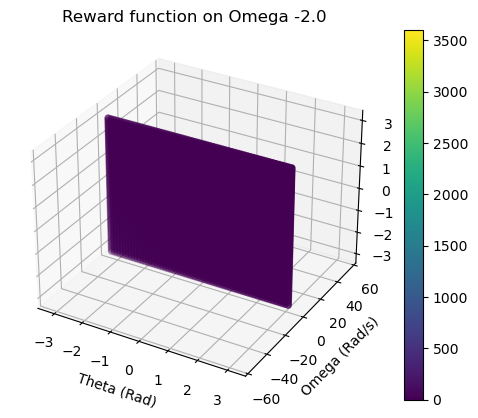

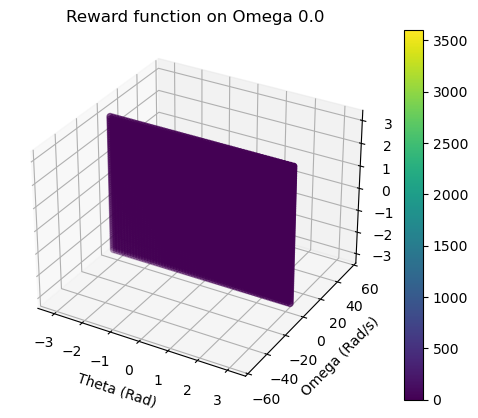

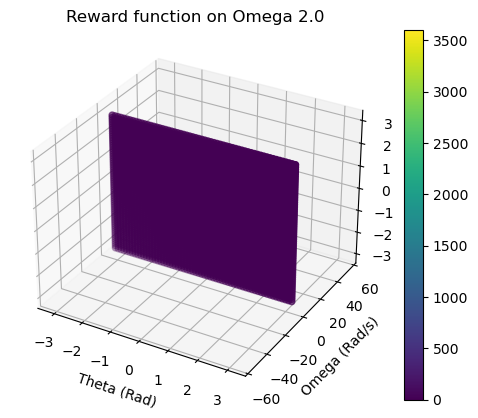

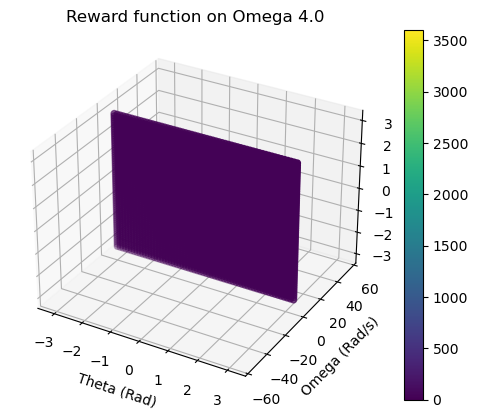

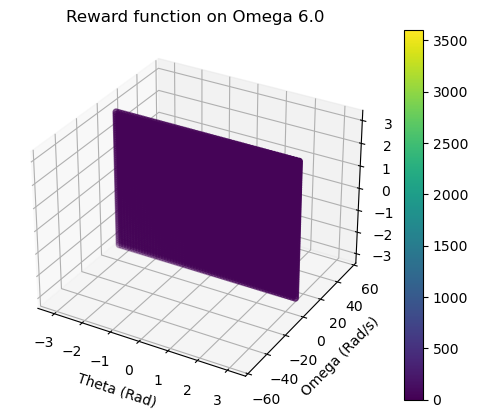

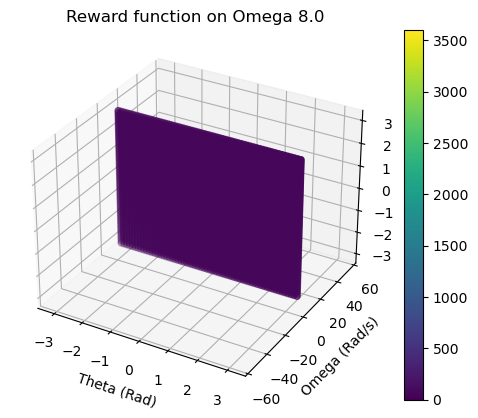

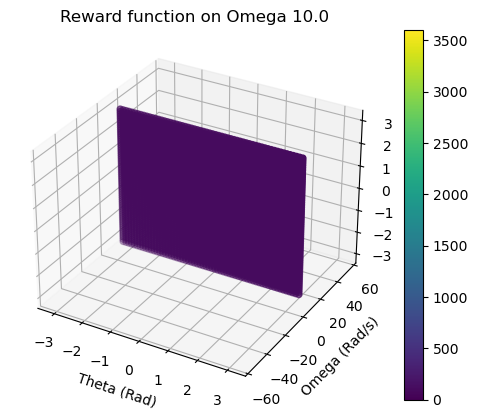

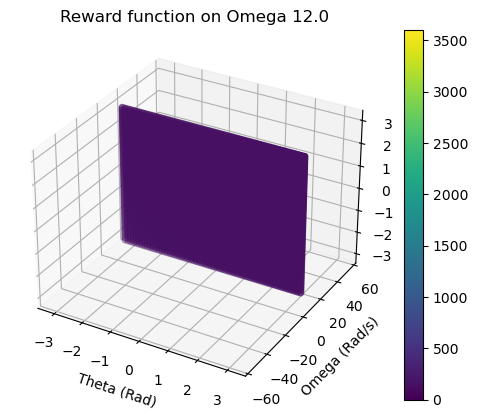

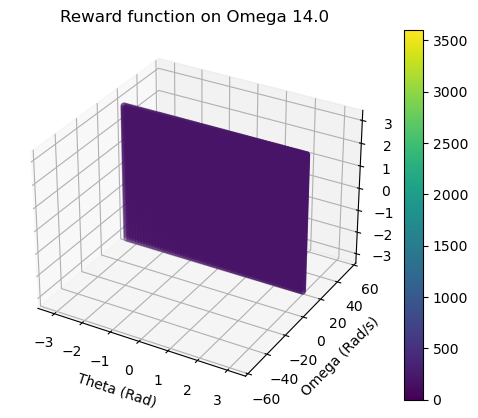

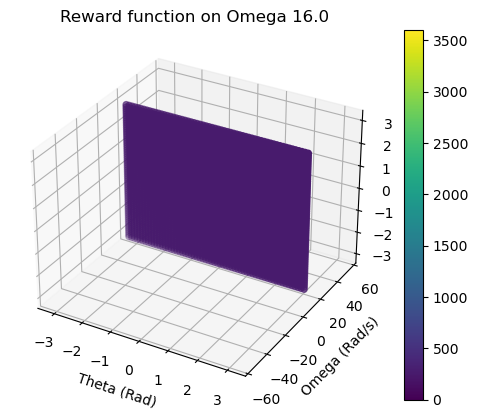

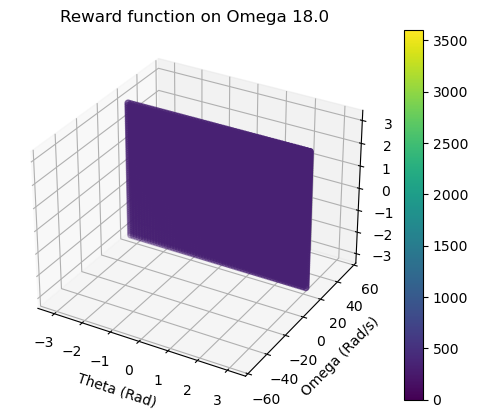

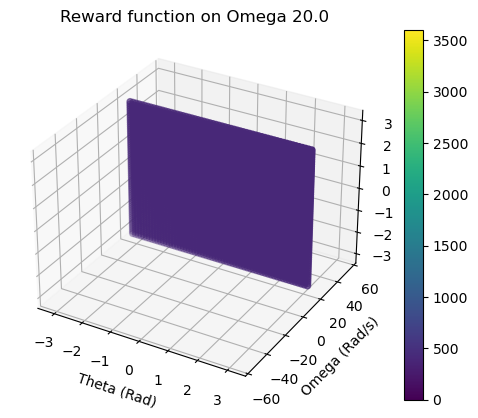

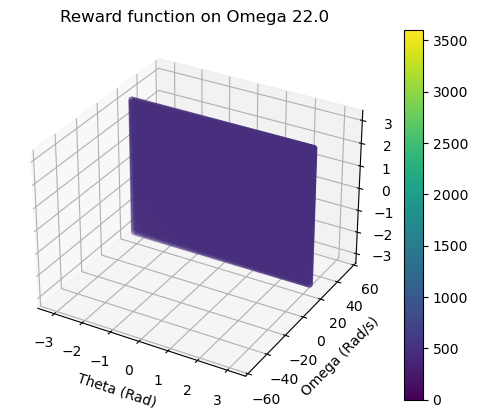

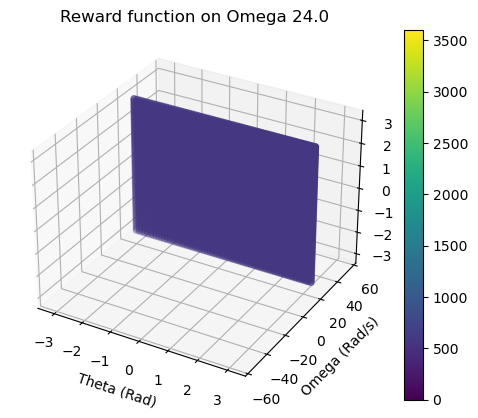

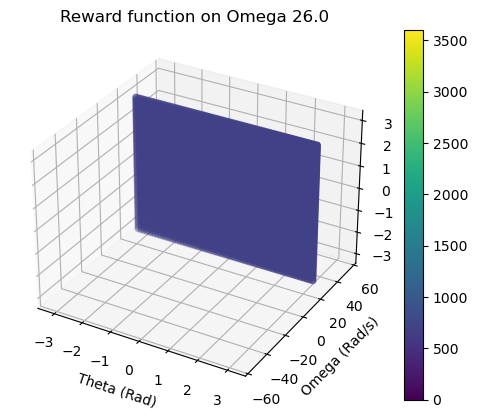

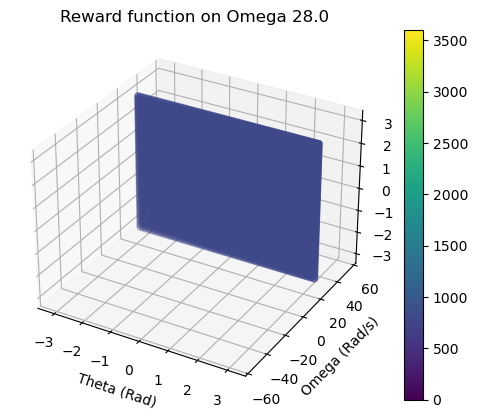

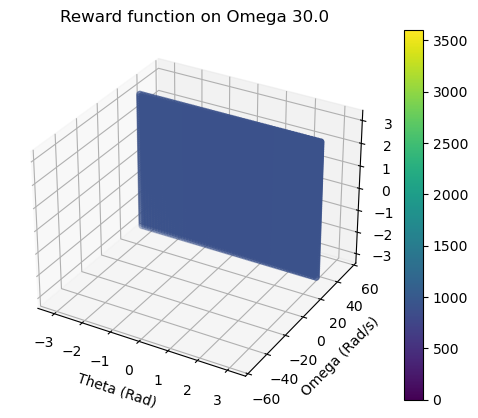

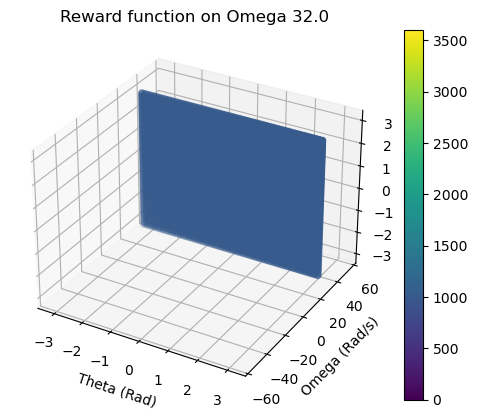

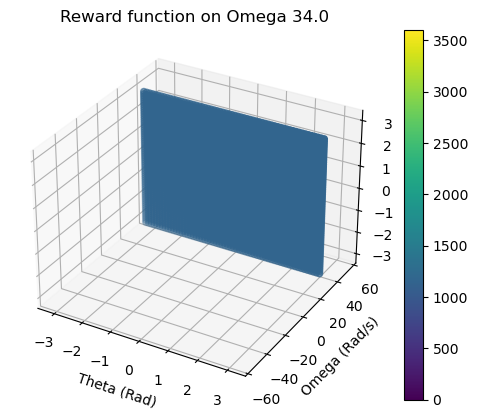

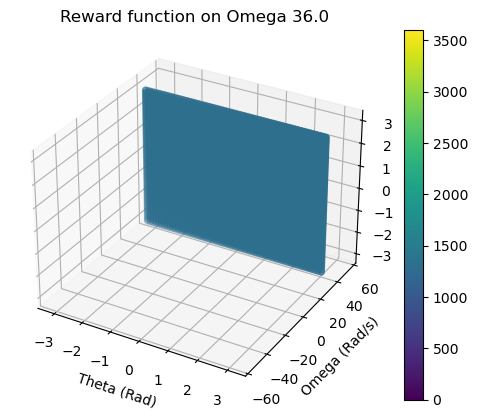

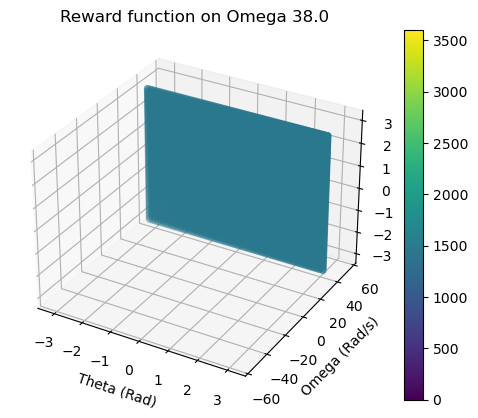

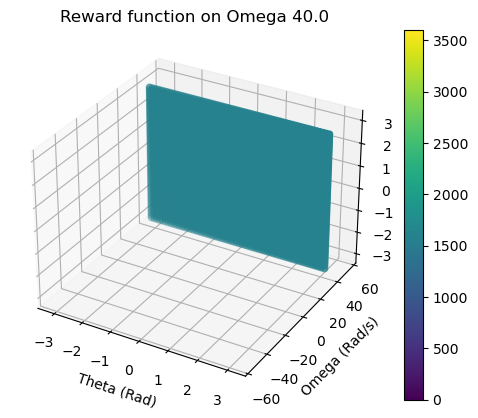

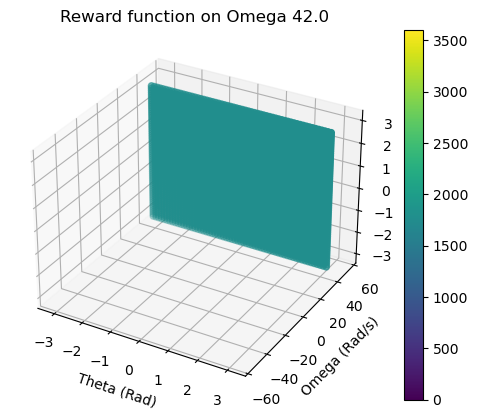

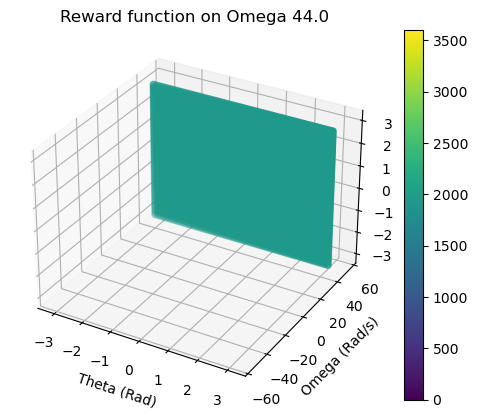

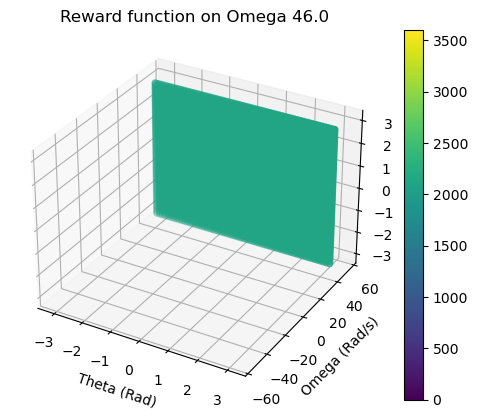

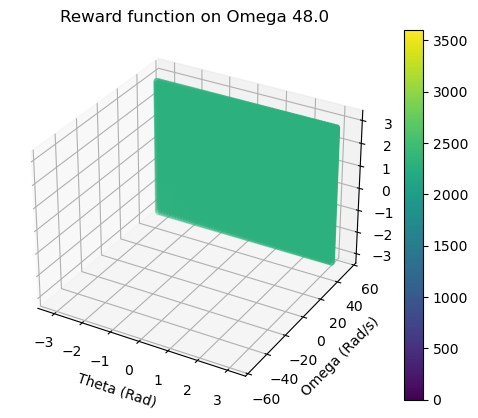

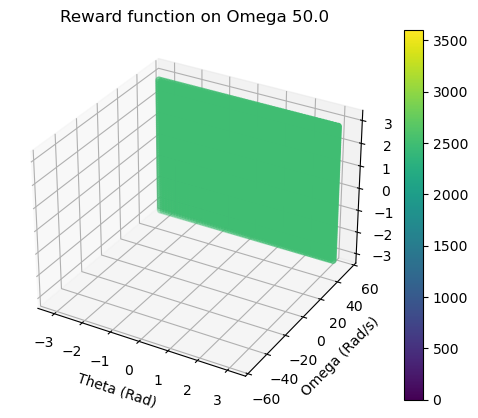

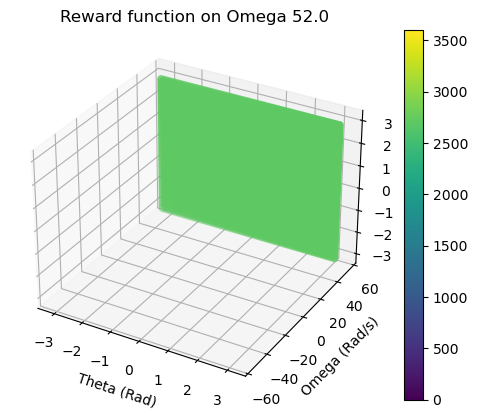

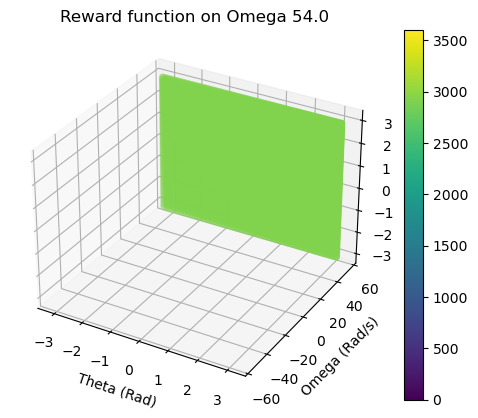

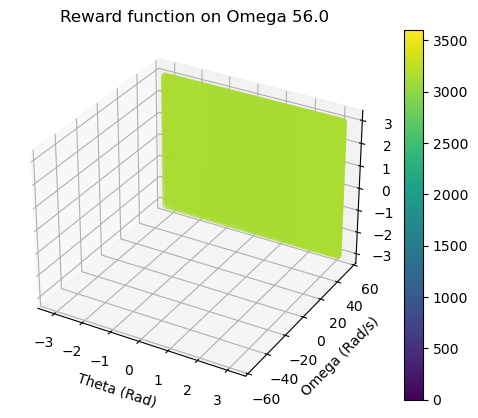

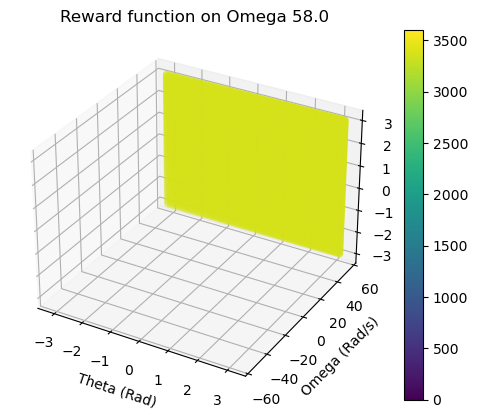

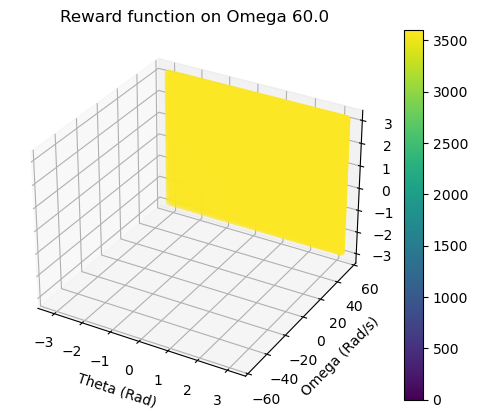

In [ ]:
for Index, value in enumerate(omega):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    theta_slice = theta[Index, :, :]
    omega_slice = omega[Index, :, :]
    u_slice = u[Index, :, :]
    reward_slice = reward[Index, :, :]

    data_plot = ax.scatter(theta_slice, omega_slice, u_slice, c=reward_slice, vmin=np.min(reward), vmax=np.max(reward))
    fig.colorbar(data_plot)
    
    plt.title('Reward function on Omega {}'.format(value[Index, Index]))
    ax.set_xlabel('Theta (Rad)')
    ax.set_ylabel('Omega (Rad/s)')
    ax.set_zlabel('Voltage (V)')
    ax.set_ylim(-60, 60)
    plt.show()